# Loading all the required libraries and methods.

In [1]:
#loading classes and packages
import pandas as pd
import numpy as np
import seaborn as sns
import shapely
import plotly.graph_objects as go
import plotly.express as px
color_pal=sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from math import sqrt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import DMatrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


# Reading dataset

In [2]:
earthquake=pd.read_csv('Eartquakes-1990-2023.csv')
earthquake

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00


# Checking whether the dataset has any missing values or not.

In [3]:
earthquake.isnull().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

# Dataset description

In [4]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


# Scatter Plot

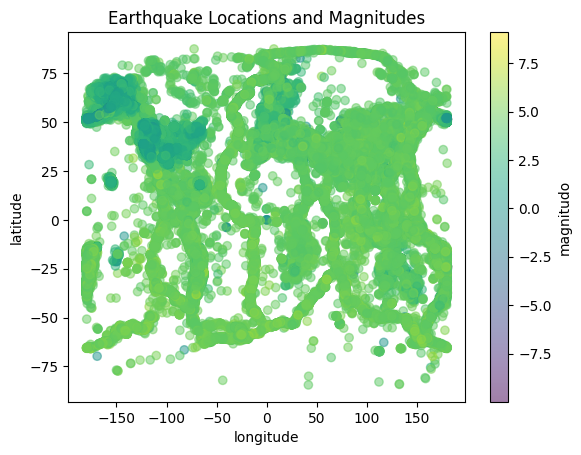

In [5]:
plt.scatter(earthquake['longitude'], earthquake['latitude'], c=earthquake['magnitudo'], cmap='viridis', alpha=0.5)
plt.colorbar(label='magnitudo')
plt.title('Earthquake Locations and Magnitudes')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

# Plots for Magnitude, Tsunami, Significance & Depth

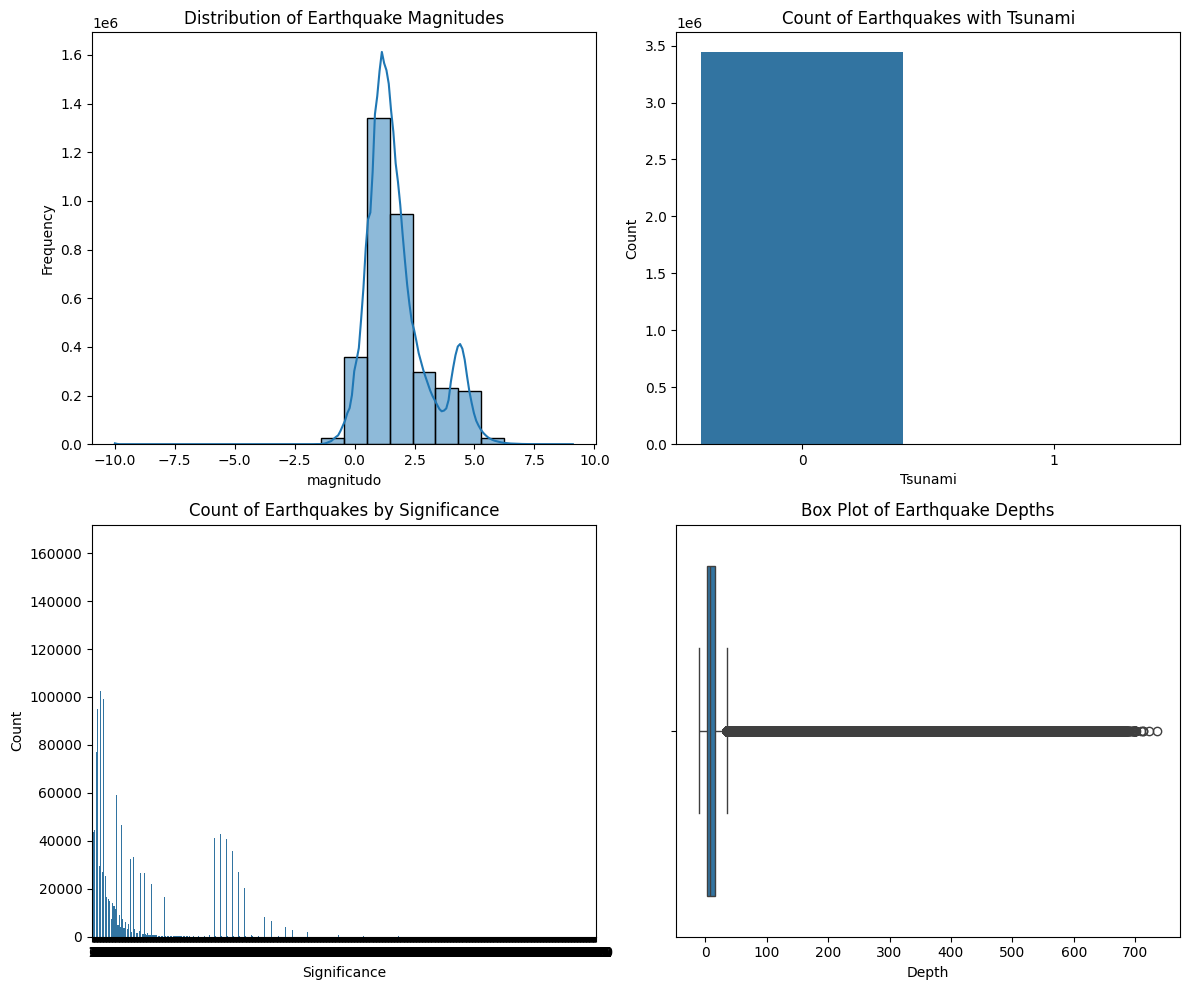

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Magnitude
sns.histplot(earthquake['magnitudo'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Earthquake Magnitudes')
axes[0, 0].set_xlabel('magnitudo')
axes[0, 0].set_ylabel('Frequency')

# Plot for Tsunami
sns.countplot(x='tsunami', data=earthquake, ax=axes[0, 1])
axes[0, 1].set_title('Count of Earthquakes with Tsunami')
axes[0, 1].set_xlabel('Tsunami')
axes[0, 1].set_ylabel('Count')

# Plot for Significance
sns.countplot(x='significance', data=earthquake, ax=axes[1, 0])
axes[1, 0].set_title('Count of Earthquakes by Significance')
axes[1, 0].set_xlabel('Significance')
axes[1, 0].set_ylabel('Count')

# Box Plot for Depth
sns.boxplot(x=earthquake['depth'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Earthquake Depths')
axes[1, 1].set_xlabel('Depth')

# Adjust layout
plt.tight_layout()
plt.show()


# Plot fo Earthquakes over time

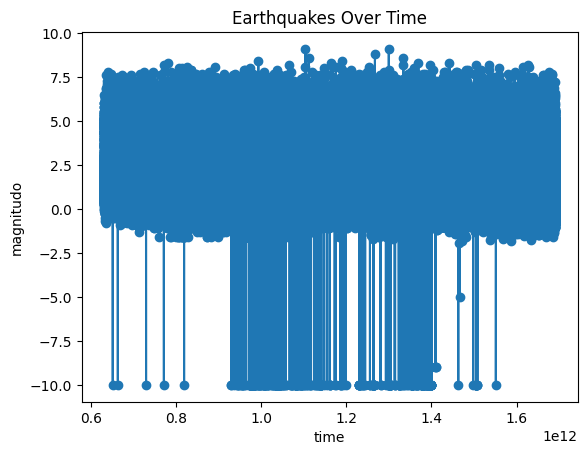

In [7]:
plt.plot(earthquake['time'], earthquake['magnitudo'], marker='o', linestyle='-')
plt.title('Earthquakes Over Time')
plt.xlabel('time')
plt.ylabel('magnitudo')
plt.show()


# Violin plot to find number of accurance of Tusnami with Earthquake

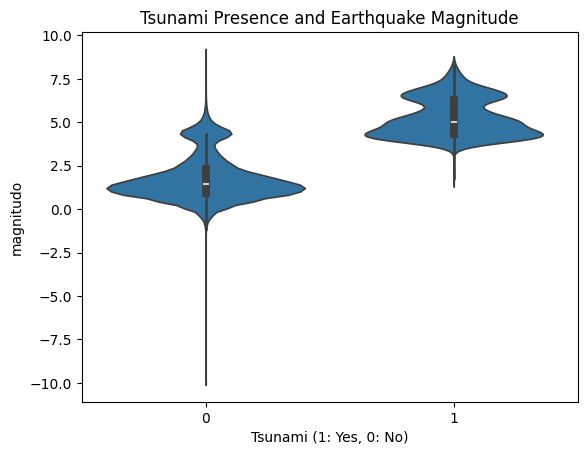

In [8]:
sns.violinplot(x=earthquake['tsunami'], y=earthquake['magnitudo'])
plt.title('Tsunami Presence and Earthquake Magnitude')
plt.xlabel('Tsunami (1: Yes, 0: No)')
plt.ylabel('magnitudo')
plt.show()


# Heatmap to find correlation

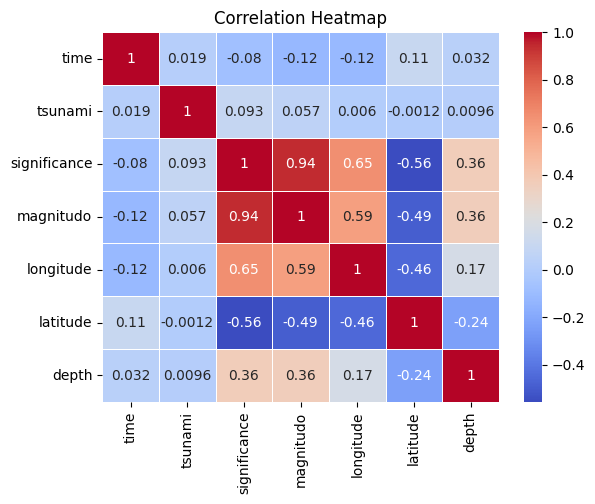

In [9]:
numeric_columns = earthquake.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = earthquake[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# MSE

In [10]:
# Extract features and target variable
X = earthquake[['significance', 'magnitudo', 'longitude', 'latitude', 'depth']]
y = earthquake['tsunami']  # Replace with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_quake = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_quake.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_quake.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0003826862761811207


# Random Forest Classification with confusion matrix

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    688836
           1       0.61      0.20      0.30       315

    accuracy                           1.00    689151
   macro avg       0.80      0.60      0.65    689151
weighted avg       1.00      1.00      1.00    689151



<Figure size 600x600 with 0 Axes>

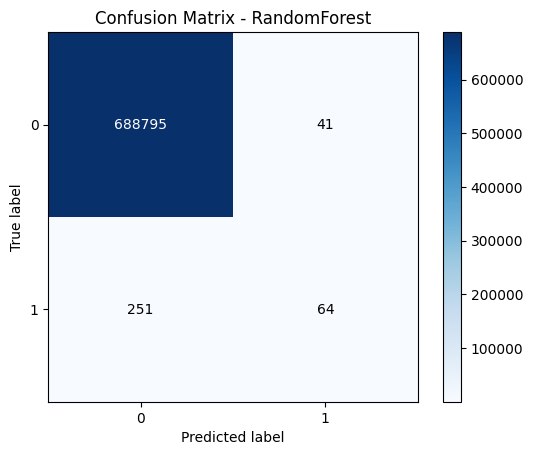

In [11]:
# Extract features and target variable
X = earthquake[['significance', 'magnitudo', 'longitude', 'latitude', 'depth']]
y = earthquake['tsunami']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate RandomForest model
rf_y_pred = rf_model.predict(X_test)
print("RandomForest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Plot confusion matrix for RandomForest using scikit-plot
from scikitplot.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(y_test, rf_y_pred, title='Confusion Matrix - RandomForest', normalize=False)
plt.show()
